# Mobile Price Classification using Machine Learning

Mobile price classification is a popular problem in machine learning, where the objective is to build a predictive model that can categorize mobile phones into different price ranges based on their features and specifications. Such a model helps automate the process of estimating the price category of a mobile device, which is valuable for both consumers and sellers. 

For consumers, it provides insights that aid in comparing devices and making informed purchase decisions. For sellers, it can support competitive pricing strategies and offer a better understanding of market trends.

## Dataset

The dataset used for this task was sourced from Kaggle under the title "Mobile Price Classification". It contains nearly 2000 entries of mobile phones with various features and specifications, along with their corresponding price range. By analyzing the features, the model can predict the price category of a mobile phone.

### Features

The dataset includes the following features:

- **battery_power**: Total energy a battery can store (in mAh).  
- **blue**: Bluetooth availability (1 = Yes, 0 = No).  
- **clock_speed**: Speed at which the processor executes instructions.  
- **dual_sim**: Dual SIM support (1 = Yes, 0 = No).  
- **fc**: Front camera resolution (in megapixels).  
- **four_g**: 4G support (1 = Yes, 0 = No).  
- **int_memory**: Internal memory (in GB).  
- **m_dep**: Mobile depth (in cm).  
- **mobile_wt**: Weight of the mobile phone.  
- **n_cores**: Number of processor cores.  
- **pc**: Primary camera resolution (in megapixels).  
- **px_height**: Pixel resolution height.  
- **px_width**: Pixel resolution width.  
- **ram**: Random Access Memory (in MB).  
- **sc_h**: Screen height (in cm).  
- **sc_w**: Screen width (in cm).  
- **talk_time**: Maximum duration a single battery charge lasts.  
- **three_g**: 3G support (1 = Yes, 0 = No).  
- **touch_screen**: Touchscreen availability (1 = Yes, 0 = No).  
- **wifi**: WiFi support (1 = Yes, 0 = No).  
- **price_range**: Target variable indicating price category:  
  - 0 = Low cost  
  - 1 = Medium cost  
  - 2 = High cost  
  - 3 = Very high cost


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sagemaker
#from sagemaker import get_execution_role
from sagemaker.sklearn import SKLearn
import boto3

import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split



sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/xdg-ubuntu/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/naser/.config/sagemaker/config.yaml


In [2]:
df = pd.read_csv("mobile_price_range_data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isnull().sum().sum()

0

In [5]:
cols = df.columns
cols

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [7]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

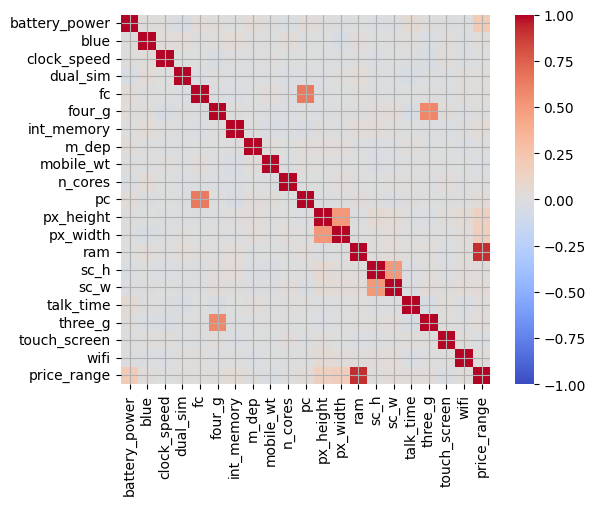

In [8]:
# Create a square heatmap with center at 0
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, center=0, square=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.grid()
plt.show()

In [9]:
X = df.drop('price_range', axis=1)
y = df['price_range']

print(f"X shape: {X.shape}\n y shape: {y.shape}")

X shape: (2000, 20)
 y shape: (2000,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


In [11]:
train_df = pd.DataFrame(X_train)
train_df['price_range'] = y_train

test_df = pd.DataFrame(X_test)
test_df['price_range'] = y_test

print(f"Train shape: {train_df.shape}\nTest shape: {test_df.shape}")

Train shape: (1600, 21)
Test shape: (400, 21)


In [12]:
# Save as CSV to upload to S3
train_df.to_csv("train_v_1.csv", index=False)
test_df.to_csv("test_v_1.csv", index=False)

# Introduction to Amazon SageMaker for Beginners

This guide explains SageMaker concepts and workflow for someone who has little to no prior experience with SageMaker. It uses simple analogies and key explanations to make the concepts easier to understand.

---

## SageMaker Python SDK: Your ML Toolbox 🧰

Imagine you want to **build a birdhouse**. You could start from scratch using raw wood and nails, but it would take a lot longer and be harder.  

Instead, someone gives you a **toolbox**:

- **Hammer, nails, saw** → Tools to perform specific tasks (like Python libraries and APIs).  
- **Instructions** → Documentation explaining how to use the tools.  
- **Pre-cut pieces or templates** → Sample code to speed up your work.  

The **SageMaker Python SDK** is like this toolbox, providing ready-made tools and instructions to build, train, and deploy machine learning models on AWS without handling all the complicated AWS infrastructure yourself.

---

## Understanding the S3 Client :
`boto3.client('s3')`

We are creating a **software helper** (called a **"client"**) in Python that knows how to talk to the **Amazon S3 service**,Amazon’s cloud storage service. To interact with it from Python, we use **Boto3**, AWS’s official Python SDK.  

- **Client Object**: Think of it as a software helper or a translator between Python and S3.  
- **Methods**: `.upload_file()`, `.download_file()`, `.list_objects_v2()` – these let you store and retrieve files easily.  
- **Analogy**: S3 is a huge warehouse:
  - **Buckets** → Rooms  
  - **Folders** → Shelves  
  - **Files** → Boxes  
  - The S3 client is a warehouse worker who knows the rules and moves boxes for you.

---

## SageMaker Session, Region, and Default Bucket

- **SageMaker Session (`sagemaker.Session()`)**
  - Keeps track of your AWS credentials and manages interactions with SageMaker services.  

- **Region**
  - Each AWS resource (S3, SageMaker, EC2, etc.) belongs to a region (e.g., `eu-central-1`).  
  - Using the session’s region ensures consistency across all services without hardcoding.

- **Default Bucket**
  - SageMaker can automatically create a default S3 bucket to store training data, model artifacts, and temporary files.  
  - Useful for experiments and quick setups without manually creating a bucket.

**Best Practice:** Always use the SageMaker session to fetch the region and default bucket for portability and consistency.

---

## SageMaker Execution Role

- The execution role is a **set of permissions** allowing SageMaker to access AWS services on your behalf (S3, CloudWatch, ECR, etc.).  
- Needed for:
  - **Training jobs** → Lets SageMaker read training data and write model artifacts.  
  - **Model deployment** → Allows SageMaker to create and manage endpoints.  
  - **Processing jobs** → Lets scripts run on SageMaker-managed infrastructure.  
  - **Batch Transform jobs** → Enables large-scale inference.  

- **Not needed** for local Python operations like pandas, numpy, or direct S3 uploads with `boto3`.

**Rule of Thumb:** 
- Whenever SageMaker runs something on AWS infrastructure for you, you need the execution role.
- If running code locally(e.g., in Linux, etc.), provide the full ARN of your SageMaker execution role as follows:
  
  - Go to AWS Management Console → IAM → Roles → AmazonSageMaker-ExecutionRole-<date> → Copy the Role ARN at the top.

---

## SageMaker Workflow: From Data to Endpoint

Here’s the typical pipeline for deploying a machine learning model using SageMaker:

1. **Set Up Session and Role**
   - Initialize SageMaker session.
   - Retrieve region and default bucket.
   - Define execution role for AWS permissions.

2. **Upload Data to S3**
   - Store training and test datasets in S3 using the session or `boto3` client.

3. **Define Training Script**
   - Prepare a Python script (`script.py`) containing:
     - Data loading and preprocessing.
     - Model definition and training (e.g., Random Forest).
     - Model evaluation and metrics reporting.
     - Model serialization (`joblib`).

4. **Create Estimator**
   - Define a SageMaker Estimator specifying:
     - Training script, instance type, count, hyperparameters.
     - Execution role.
     - Optional settings like spot instances or max runtime.

5. **Train the Model**
   - Launch training job on SageMaker.
   - Monitor logs and wait for job completion.
   - SageMaker stores trained model artifacts in S3.

6. **Locate Model Artifact**
   - Retrieve the S3 URI of the trained model artifact (e.g., `model.tar.gz` containing `model.joblib`).

7. **Deploy Model as Endpoint**
   - Use `SKLearnModel` or `Estimator.deploy()` to create an endpoint.
   - SageMaker provisions an instance and hosts the model for real-time predictions.

8. **Invoke Endpoint for Predictions**
   - Send input data to the endpoint using a predictor.
   - Receive predictions (e.g., price categories for mobile phones).

9. **Clean Up**
   - Delete the endpoint when no longer needed to avoid charges.

---

This workflow allows you to **train, evaluate, deploy, and predict** using AWS SageMaker while minimizing manual management of servers or infrastructure.


In [13]:
# -------------------------
# Start SageMaker session
# -------------------------
sagemaker_session = sagemaker.Session()

# Default bucket and AWS region
default_bucket_name = sagemaker_session.default_bucket()
print("My default S3 bucket:", default_bucket_name)

region = sagemaker_session.boto_session.region_name
print("Using AWS region:", region)

# -------------------------
# Execution role
# -------------------------
# If inside SageMaker Studio/Notebook
# role = sagemaker.get_execution_role()

# If running locally, provide the full ARN of your SageMaker execution role
# Go to AWS Management Console → IAM → Roles → AmazonSageMaker-ExecutionRole-<date> → Copy the Role ARN at the top.
role = "arn:aws:iam::577947472108:role/service-role/AmazonSageMaker-ExecutionRole-20250812T103590"

# -------------------------
# S3 Upload
# -------------------------
bucket_name = default_bucket_name
prefix = "mobile_price_classification"  # Folder in S3
local_file = "mobile_price_range_data.csv"
s3_key = f"{prefix}/data/{local_file}"  # path in S3 bucket: s3_data_path

# Create S3 client: used for uploading/downloading files from S3.
s3_client = boto3.client("s3", region_name=region)

# Upload file
try:
    s3_client.upload_file(local_file, bucket_name, s3_key)
    print(f"✅ Uploaded {local_file} to S3://{bucket_name}/{s3_key}")
except Exception as e:
    print(f"❌ Upload failed: {e}")


My default S3 bucket: sagemaker-eu-central-1-577947472108
Using AWS region: eu-central-1
✅ Uploaded mobile_price_range_data.csv to S3://sagemaker-eu-central-1-577947472108/mobile_price_classification/data/mobile_price_range_data.csv


# Upload Training and Test Data to S3

This cell uploads local CSV files to the SageMaker S3 bucket so that the training job can access them:

- **`s3_data_path`**: The folder path inside the S3 bucket.  
- **`upload_data`**: Uploads local files (`train_v_1.csv` and `test_v_1.csv`) to the specified S3 bucket and prefix.  
- **`train_uri_s3` / `test_uri_s3`**: Stores the full S3 URIs of the uploaded training and test data, which are used as inputs when launching the training job.


In [14]:
# Upload a directory
s3_data_path = f"{prefix}/data"    
train_uri_s3 = sagemaker_session.upload_data(path='train_v_1.csv', bucket=bucket_name, key_prefix=s3_data_path)
test_uri_s3 = sagemaker_session.upload_data(path='test_v_1.csv', bucket=bucket_name, key_prefix=s3_data_path)

print("Train data S3 URI:", train_uri_s3)
print("Test data S3 URI:", test_uri_s3)

Train data S3 URI: s3://sagemaker-eu-central-1-577947472108/mobile_price_classification/data/train_v_1.csv
Test data S3 URI: s3://sagemaker-eu-central-1-577947472108/mobile_price_classification/data/test_v_1.csv


### Pandas Brackets: One vs Two

- **Single brackets `[ ]`:**
   If you pass a **string** (e.g., `df["col"]`), you get a **Series** (1D).  
    ```python
    y_train = train_df[label]   # returns a Series
    ```

- **Double brackets `[[ ]]`:**
  If you pass a **list of columns** (even one), you get a **DataFrame** (2D).  
    ```python
    y_train = train_df[[label]]   # returns a DataFrame
    ```
---
- **In our code:**
  ```python
  X_train = train_df[features]   # ✅ features is a list → DataFrame
  y_train = train_df[label]      # ✅ label is a string → Series


# Random Forest Training Script for SageMaker

This script (`script.py`) trains a Random Forest model on input CSV data using SageMaker and saves the trained model for deployment. It performs the following steps:

- `%%` → Indicates that the command applies to the entire cell.  
- `writefile` → Tells Jupyter to save the cell’s content into a file.  
- `script.py` → The name of the file to be created (or overwritten).  
1. **Imports Libraries**: Uses `pandas`, `numpy`, `sklearn`, `joblib`, and `boto3`.  
2. **Model Loading Function**: The `model_fn(model_dir)` function loads training and test CSV files from SageMaker channels.  
3. **Argument Parsing**: Accepts hyperparameters (`--n-estimators`, `--min-samples-leaf`), data directories (`--train`, `--test`), file names (`--train-file`, `--test-file`), and model directory (`--model-dir`).  
4. **Data Loading**: Reads training and testing CSV files from S3 channels or local paths.  
5. **Prepare Features and Labels**: Splits data into features (`X_train`, `X_test`) and target labels (`y_train`, `y_test`).  
6. **Train the Model**: Trains a `RandomForestClassifier` using the specified hyperparameters.  
7. **Validate the Model**: Evaluates the model on test data using accuracy and classification report.  
8. **Persist the Model**: Saves the trained model to the `model_dir` using `joblib` so it can be loaded later for inference.


In [15]:
%%writefile script.py

import argparse
import boto3
import pathlib
from io import StringIO
import os
import joblib
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, classification_report, confusion_matrix


#this function load the model
def model_fn(model_dir):
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf

if __name__ == "__main__":
    print("extracting arguments")
    parser = argparse.ArgumentParser()

    # Hyperparameters sent by the client are passed as command-line arguments to the script.
    parser.add_argument("--n-estimators", type=int, default=10)
    parser.add_argument("--min-samples-leaf", type=int, default=3)

    # Data, model, and output directories
    parser.add_argument("--model-dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--train", type=str, default=os.environ.get("SM_CHANNEL_TRAIN"))
    parser.add_argument("--test", type=str, default=os.environ.get("SM_CHANNEL_TEST"))
    parser.add_argument("--train-file", type=str, default="train_v_1.csv")
    parser.add_argument("--test-file", type=str, default="test_v_1.csv")
    
    args, _ = parser.parse_known_args()

    print("SKLearn Version: ", sklearn.__version__)
    print("joblib Version: ", joblib.__version__)
    
    print("reading data")
    # Read data
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))
    
    # Features and label
    features = list(train_df.columns)
    label = features.pop(-1)

    print("building training and testing datasets")
    X_train = train_df[features]
    y_train = train_df[label]
    X_test = test_df[features]
    y_test = test_df[label]

    
    # Train model
    print("training model")

    model = RandomForestClassifier(
       n_estimators=args.n_estimators,
       min_samples_leaf=args.min_samples_leaf,
       n_jobs=-1)

    model.fit(X_train, y_train) 

    
    # Validate model
    print("validating model")

    y_pred = model.predict(X_test)

    # Accuracy score
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.3f}")

    # Classification report
    clf_report = classification_report(y_test, y_pred)
    print("Classification Report:\n")
    print(clf_report)

    # Persist model
    model_path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model, model_path)
    print("model persisted at " + model_path)

Overwriting script.py


### Define and Configure the SageMaker SKLearn Estimator

This cell sets up the SageMaker `SKLearn` estimator, specifying:
- The training script (`script.py`) as the entry point.
- The IAM execution role for SageMaker.
- Instance type and count.
- SKLearn framework version.
- Hyperparameters for the Random Forest model (`n_estimators` and `min_samples_leaf`).
- Spot instance usage, maximum wait, and run time.


In [16]:
# We use the Estimator from the SageMaker Python SDK
from sagemaker.sklearn.estimator import SKLearn
FRAMEWORK_VERSION = "0.23-1"

sklearn_estimator = SKLearn(
   entry_point="script.py",
   role= "arn:aws:iam::577947472108:role/service-role/AmazonSageMaker-ExecutionRole-20250812T103590",
   instance_count=1,
   instance_type="ml.c5.xlarge",
   framework_version=FRAMEWORK_VERSION,
   base_job_name="rf-scikit",
   hyperparameters={
    "n_estimators": 100,
    "min_samples_leaf": 3,
 
   },
   use_spot_instances = True,
   max_wait = 7200, 
   max_run = 3600
)

# Launching the Training Job

This step sends your training job to SageMaker:

- **`sklearn_estimator.fit()`**: Starts training your model using the provided training script and datasets.  
- **Input Channels**: A dictionary specifying where the training and test data are in S3 (`{"train": ..., "test": ...}`).  
- **`wait=True`**: Ensures the notebook waits until the training job finishes before moving on.  

Key Notes:

- SageMaker automatically provisions the specified instance type (`ml.c5.xlarge`) and handles the training environment.  
- Your model will be trained with the hyperparameters you defined in the estimator.  
- Once training is complete, the model artifact is saved in S3 and is ready for deployment or further analysis.


In [17]:
sklearn_estimator.fit({"train": train_uri_s3, "test": test_uri_s3}, wait=True)

INFO:sagemaker:Creating training-job with name: rf-scikit-2025-08-29-10-41-22-294


2025-08-29 10:41:24 Starting - Starting the training job...
2025-08-29 10:41:55 Downloading - Downloading input data...
2025-08-29 10:42:10 Downloading - Downloading the training image...
2025-08-29 10:42:56 Training - Training image download completed. Training in progress.
2025-08-29 10:42:56 Uploading - Uploading generated training model2025-08-29 10:42:51,430 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-08-29 10:42:51,433 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-08-29 10:42:51,469 sagemaker_sklearn_container.training INFO     Invoking user training script.
2025-08-29 10:42:51,665 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-08-29 10:42:51,676 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-08-29 10:42:51,686 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-08-29 10:42:51

# Locate Trained Model Artifact in S3:

This cell retrieves the S3 location of the trained model: 
- **sm_boto3**: A SageMaker client used to interact with SageMaker resources.
- **Wait for Training Completion**: Ensures the training job has finished before fetching the artifact.
- **describe_training_job**: Returns metadata about the training job, including the S3 path of the trained model. -
- **artifact_path**: Stores the S3 URI of the trained model artifact(e.g., model.tar.gz), which contains the serialized model (like model.joblib).

  It can be used for deployment or further processing.

In [18]:
# SageMaker client
sm_boto3 = boto3.client("sagemaker", region_name=region)

# Wait for training job to complete
sklearn_estimator.latest_training_job.wait(logs="None")

# Fetch model artifact S3 path
artifact_path = sm_boto3.describe_training_job(
    TrainingJobName=sklearn_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]

print("Model artifact persisted at " + artifact_path)



2025-08-29 10:43:09 Starting - Preparing the instances for training
2025-08-29 10:43:09 Downloading - Downloading the training image
2025-08-29 10:43:09 Training - Training image download completed. Training in progress.
2025-08-29 10:43:09 Uploading - Uploading generated training model
2025-08-29 10:43:09 Completed - Training job completed
Model artifact persisted at s3://sagemaker-eu-central-1-577947472108/rf-scikit-2025-08-29-10-41-22-294/output/model.tar.gz


# Creating a Deployable SageMaker Model

This cell prepares a SageMaker `SKLearnModel` object that can be deployed as an endpoint:

- **Model Name:** Dynamically generated with the current date and time.  
- **Model Data:** Points to the trained model artifact stored in S3 (`artifact_path`).  
- **Execution Role:** Provides permissions to SageMaker to access S3 and perform inference.  
- **Entry Point:** `script.py` contains the code for loading and using the model.  
- **Framework Version:** Specifies the scikit-learn version used during training.

Once created, this model object can be deployed to an endpoint for real-time predictions.


In [19]:
# this cell is to make a copy to deploy a specific model as an end-point

from sagemaker.sklearn.model import SKLearnModel
from time import gmtime, strftime

model_name = "Custom-sklearn-model-"+ strftime("%Y-%m-%d-%H-%M-%S", gmtime())
model = SKLearnModel(
    name = model_name,
    model_data=artifact_path,
    role = "arn:aws:iam::577947472108:role/service-role/AmazonSageMaker-ExecutionRole-20250812T103590",
    #role=get_execution_role(),
    entry_point="script.py",
    framework_version=FRAMEWORK_VERSION,
)

In [20]:
model_name

'Custom-sklearn-model-2025-08-29-10-43-50'

# Deploying the Model as a SageMaker Endpoint

This cell deploys the trained Random Forest model to a SageMaker endpoint:

- **Endpoint Name:** Generated dynamically using the current date and time. It must follow SageMaker naming rules:  
  - Only letters, numbers, and hyphens (`-`) are allowed.  
  - Cannot end with a hyphen.  
  - Underscores (`_`) are not allowed.
- **Instance Type:** `ml.m4.xlarge`  
- **Instance Count:** 1  

The `predictor` object returned allows us to make real-time predictions on new data using this endpoint.


In [33]:
endpoint_name = "Custom-sklearn-model-"+ strftime("%Y-%m-%d-%H-%M-%S", gmtime()) # %m → month, %M → minutes
print("EndpointName={}".format(endpoint_name))

predictor = model.deploy(instance_type="ml.m4.xlarge", 
                         initial_instance_count=1, 
                         endpoint_name = endpoint_name)


EndpointName=Custom-sklearn-model-2025-08-29-11-20-45


INFO:sagemaker:Creating model with name: Custom-sklearn-model-2025-08-29-10-43-50
INFO:sagemaker:Creating endpoint-config with name Custom-sklearn-model-2025-08-29-11-20-45
INFO:sagemaker:Creating endpoint with name Custom-sklearn-model-2025-08-29-11-20-45


-------!

In [39]:
features = test_df.columns.drop('price_range')
print(f"Features: {features.to_list()}")

test_df[features][0:2].values.tolist()

Features: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


[[1646.0,
  0.0,
  2.5,
  0.0,
  3.0,
  1.0,
  25.0,
  0.6,
  200.0,
  2.0,
  5.0,
  211.0,
  1608.0,
  686.0,
  8.0,
  6.0,
  11.0,
  1.0,
  1.0,
  0.0],
 [1182.0,
  0.0,
  0.5,
  0.0,
  7.0,
  1.0,
  8.0,
  0.5,
  138.0,
  8.0,
  16.0,
  275.0,
  986.0,
  2563.0,
  19.0,
  17.0,
  19.0,
  1.0,
  0.0,
  0.0]]

In [40]:
predictor

# Make Predictions with Deployed Model

This cell uses the deployed SageMaker `predictor` to generate predictions for the first two rows of the test dataset.  
The output, stored in `price_predictions`, represents the predicted mobile price categories for these samples.

### Interpreting Predicted Price Categories

In this mobile price classification model, the numeric predictions correspond to price categories:

- `0` → Low price  
- `1` → Medium price  
- `2` → High price  
- `3` → Very high price  

So, for example, if `price_predictions = [0, 2]`, it means:  
- The first mobile is predicted to be **low priced**  
- The second mobile is predicted to be **high priced**


In [41]:
features = test_df.columns.drop('price_range')
price_predictions = predictor.predict(test_df[features][0:2].values.tolist())
price_predictions

array([0, 2])

# Delete SageMaker Endpoint

This cell deletes the deployed SageMaker endpoint associated with the `predictor`. 
Removing the endpoint helps avoid ongoing charges for the hosted model.


In [45]:
##sm_boto3.delete_endpoint()
#sm_boto3.delete_endpoint(EndpointName=predictor.endpoint_name)

# Automatically Deleting the Latest SageMaker Endpoint

This cell **finds and deletes the most recently created SageMaker endpoint** to free up resources and avoid unnecessary costs:

- `list_endpoints(MaxResults=10)` → Lists the last 10 endpoints in your account.  
- `sorted(..., key=lambda x: x['CreationTime'])` → Sorts endpoints by creation time.  
- `latest_endpoint = ...` → Selects the newest endpoint.  
- `delete_endpoint(EndpointName=latest_endpoint)` → Deletes that endpoint from SageMaker.  

💡 **Tip:** Always delete endpoints you no longer need to **save AWS costs**.


In [44]:
response = sm_boto3.list_endpoints(MaxResults=10)
endpoints_sorted = sorted(response['Endpoints'], key=lambda x: x['CreationTime'])
latest_endpoint = endpoints_sorted[-1]['EndpointName']

print("Deleting endpoint:", latest_endpoint)
sm_boto3.delete_endpoint(EndpointName=latest_endpoint)


Deleting endpoint: Custom-sklearn-model-2025-08-29-10-43-50


{'ResponseMetadata': {'RequestId': '23536934-770d-4242-b330-707d83a4e16d',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '23536934-770d-4242-b330-707d83a4e16d',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Fri, 29 Aug 2025 12:04:14 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}